# [Mini-Project] -> _5 models_

## 1.) Sample Dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

file_name = '../sourcecode/dataset/6-bit.csv'
data = pd.read_csv(file_name)
data.head()
X = data.drop(['output'], axis=1)
Y = data[['output']].values.ravel()

_, X_test, _, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

data.head(16)

,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,output
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1
2,0,0,0,0,1,0,2
3,0,0,0,0,1,1,3
4,0,0,0,1,0,0,4
5,0,0,0,1,0,1,5
6,0,0,0,1,1,0,6
7,0,0,0,1,1,1,7
8,0,0,1,0,0,0,8
9,0,0,1,0,0,1,9


## 2.) Evaluation function

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

def matric_base(predicted, ground_truth):
    accuracy = accuracy_score(predicted, ground_truth)
    precision = precision_score(predicted, ground_truth, average='micro')
    recall = recall_score(predicted, ground_truth, average='micro')
    f1 = f1_score(predicted, ground_truth, average='micro')
    clf_report = classification_report(predicted, ground_truth, zero_division=0)

    print(f'Accuracy score : {accuracy:.3f}')
    print(f'Precision score : {precision:.3f}')
    print(f'Recall score : {recall:.3f}')
    print(f'F1 score : {f1:.3f}')
    print(clf_report)
    
def matric_calculation(predicted, ground_truth):
    matric_base(predicted, ground_truth)
    confusion = confusion_matrix(predicted, ground_truth)

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(Y_test))
    disp.plot(cmap='Blues', xticks_rotation=90)

## 3.) Decision Tree Classifier

Predicted output: [52 58  0 44  5 36 16 12 25 61 56  9 40]
Accuracy score : 1.000
Precision score : 1.000
Recall score : 1.000
F1 score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          36       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         1
          58       1.00      1.00      1.00         1
          61       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00 

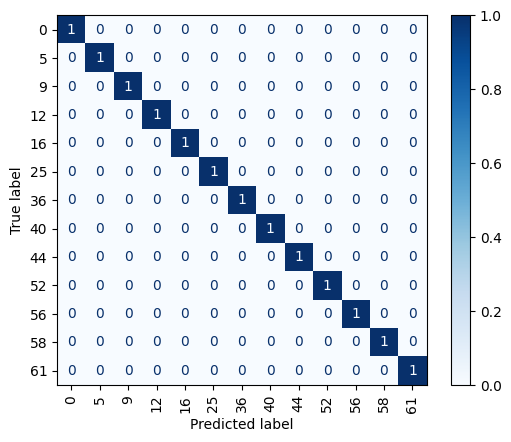

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X, Y)

y_pred = dtc.predict(X_test)
print(f'Predicted output: {y_pred}')

matric_calculation(Y_test, y_pred)

## 4.) Naive Bayes Classifier

Predicted output: [52 58  0 44  5 36 16 12 25 61 56  9 40]
Accuracy score : 1.000
Precision score : 1.000
Recall score : 1.000
F1 score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          36       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         1
          58       1.00      1.00      1.00         1
          61       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00 

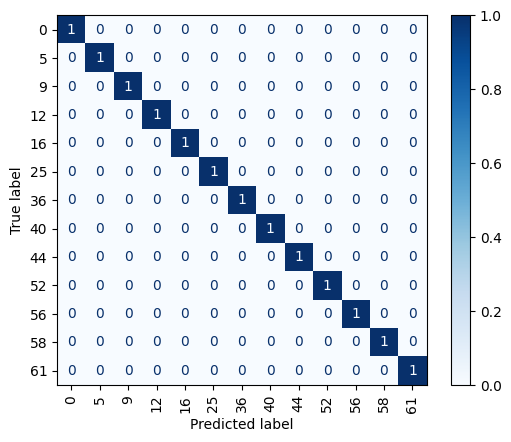

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X, Y)

y_pred = nb.predict(X_test)
print(f'Predicted output: {y_pred}')

matric_calculation(Y_test, y_pred)

## 5.) Perceptron classifier

In [33]:
from sklearn.linear_model import Perceptron

pct = Perceptron(random_state=42, max_iter=1000)
pct = pct.fit(X, Y)

y_pred = pct.predict(X_test)
print(f'Predicted output: {y_pred}')

matric_base(Y_test, y_pred)

Predicted output: [52 59  0 36  5 36 16 44 24 45 24 13 40]
Accuracy score : 0.462
Precision score : 0.462
Recall score : 0.462
F1 score : 0.462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          36       0.50      1.00      0.67         1
          40       1.00      1.00      1.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          52       1.00      1.00      1.00         1
          56       0.00      0.00      0.00         1
          58       0.00      0.00      0.00  

## 6.) Multi-Layer Perceptron Classifier

Predicted output : [52 58  0 44  5 36 16 12 25 61 56  9 40]
Accuracy score : 1.000
Precision score : 1.000
Recall score : 1.000
F1 score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          36       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         1
          58       1.00      1.00      1.00         1
          61       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00

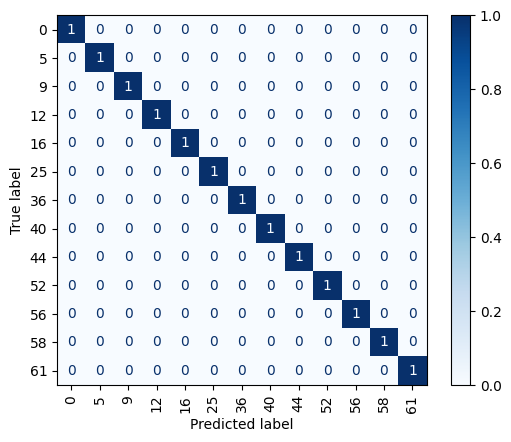

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000, random_state=42, learning_rate_init=0.01)
mlp.fit(X, Y)

y_pred = mlp.predict(X_test)
print(f'Predicted output : {y_pred}')

matric_calculation(Y_test, y_pred)

## 7.) Ensemble

Predicted output: [52 58  0 44  5 36 16 12 25 61 56  9 40]
Accuracy score : 1.000
Precision score : 1.000
Recall score : 1.000
F1 score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          36       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         1
          58       1.00      1.00      1.00         1
          61       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00 

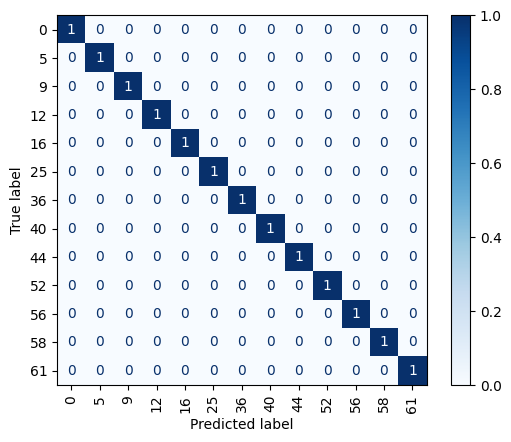

In [35]:
from sklearn.ensemble import VotingClassifier

dtc = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()
pct = Perceptron(random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=10000, random_state=42, learning_rate_init=0.01)

ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dtc),
    ('naive_bayes', nb),
    ('perceptron', pct),
    ('multi_layer_perceptron', mlp)
])

ensemble_model.fit(X, Y)

y_pred = ensemble_model.predict(X_test)

print(f'Predicted output: {y_pred}')

matric_calculation(Y_test, y_pred)